In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib import animation
from itertools import combinations 

from classicalfield_orig import FiniteTempGPE as gpe
from PointTracking_v2 import PointTracker as pt
 

In [26]:
def track_objects_and_plot(matrices):
    """
    Track moving objects in a sequence of sparse matrices and plot their trajectories.
    Args:
        matrices (list of np.ndarray): List of binary n x m matrices representing frames.
    """
    # List to hold trajectories for each object
    trajectories = []
    # Get initial object positions from first frame
    positions = np.argwhere(matrices[0] < -6.2)
    for pos in positions:
        trajectories.append([pos])
 
    # Track objects in subsequent frames
    for frame in matrices[1:]:
        new_positions = np.argwhere(frame < -6.2)
        if len(new_positions) == 0:
            continue
        old_positions = np.array([traj[-1] for traj in trajectories])
        # Compute pairwise distances between previous and current object positions
        print(old_positions)
        print(new_positions)
        distance_matrix = cdist(old_positions, new_positions)
        # Match each old position to the nearest new one
        matched_indices = np.argmin(distance_matrix, axis=1)
        # Update trajectories
        for i, match_idx in enumerate(matched_indices):
            trajectories[i].append(new_positions[match_idx])
    # Plot trajectories
    plt.figure(figsize=(8, 6))
    for traj in trajectories:
        traj = np.array(traj)
        plt.plot(traj[:, 1], traj[:, 0], marker='o')  # Note: matrix row is y, col is x
    plt.title('Tracked Object Trajectories')
    plt.gca().invert_yaxis()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

Total Imag Time:  1.3570635318756104
kmax:  4.0212385965949355
T:  4.042589962686201
(401, 128, 128)
(1, 128, 128)


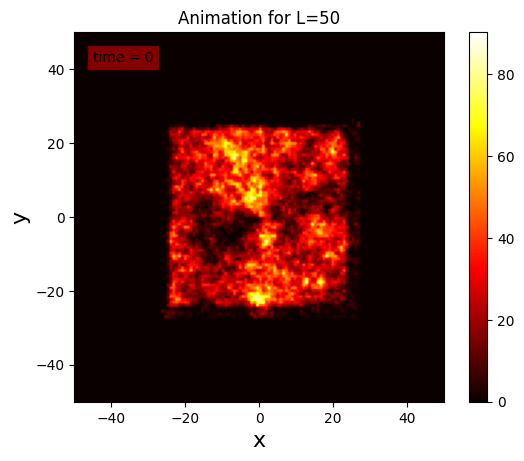

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 100000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 0.5, dst = False, vortex = True)

In [3]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)

In [4]:
circ_frames = np.zeros((len(g.snaps), len(g.snaps[0])//2, len(g.snaps[0])//2))
for i in range(len(g.snaps)): 
    circ_frames[i] = pt.detectVortices(tracker, g.snaps[i])[2] 

[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 36]
 [32 31]]
[[32 31]
 [31 36]]
[[31 36]
 [32 31]]
[[32 31]
 [31 36]]
[[31 36]
 [32 31]]
[[32 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 31]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [31 36]]
[[31 30]
 [32 36]]
[[31 30]
 [32 36]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [31 37]]
[[31 30]
 [3

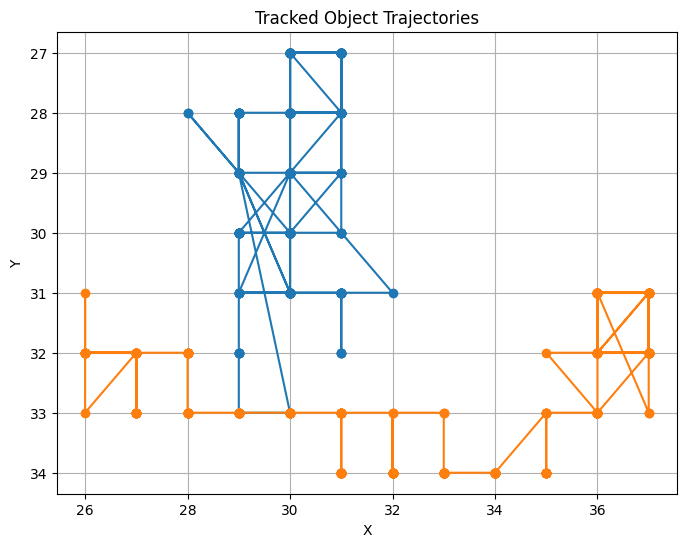

In [28]:
# matrices = []
# for i in range(10):
#     mat = np.zeros((10, 10), dtype=int)
#     mat[i % 10, i % 10] = 1  # One object moving diagonally
#     mat[(i+3) % 10, (i+5) % 10] = 1  # Another object moving in a different pattern
#     matrices.append(mat)
# #print(np.shape(matrices))

# matrices = list(circ_frames)
# # print("")
# # print(circ_frames[0])
 
# track_objects_and_plot(matrices)

Consider dynamic case

In [103]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.spatial.distance import cdist
 
# def track_objects_and_plot(matrices, distance_threshold=3, max_missed_frames=2):
#     """
#     Track moving objects in sparse matrices, allowing dynamic appearance and disappearance.
#     Args:
#         matrices (list of np.ndarray): List of binary n x m matrices.
#         distance_threshold (float): Max distance to consider for matching.
#         max_missed_frames (int): Max number of frames to keep unmatched trajectories.
#     """
#     class Track:
#         def __init__(self, position):
#             self.positions = [position]
#             self.last_position = position
#             self.missed_frames = 0
#     tracks = []
 
#     for frame_idx, frame in enumerate(matrices):
#         detections = np.argwhere(frame < -6.2)
 
#         if frame_idx == 0:
#             # Initialize tracks with first frame detections
#             for det in detections:
#                 tracks.append(Track(det))
#             continue
 
#         unmatched_tracks = list(range(len(tracks)))
#         unmatched_detections = list(range(len(detections)))
 
#         if len(detections) > 0 and len(tracks) > 0:
#             track_positions = np.array([t.last_position for t in tracks])
#             distance_matrix = cdist(track_positions, detections)
 
#             used_detections = set()
 
#             for track_idx in np.argsort(np.min(distance_matrix, axis=1)):
#                 # Find closest detection for this track
#                 distances = distance_matrix[track_idx]
#                 det_idx = np.argmin(distances)
#                 if distances[det_idx] < distance_threshold and det_idx not in used_detections:
#                     tracks[track_idx].positions.append(detections[det_idx])
#                     tracks[track_idx].last_position = detections[det_idx]
#                     tracks[track_idx].missed_frames = 0
#                     used_detections.add(det_idx)
#                     if track_idx in unmatched_tracks:
#                         unmatched_tracks.remove(track_idx)
#                     if det_idx in unmatched_detections:
#                         unmatched_detections.remove(det_idx)
 
#         # Increment missed frame count for unmatched tracks
#         for i in unmatched_tracks:
#             tracks[i].missed_frames += 1
 
#         # Remove tracks that have been unmatched for too long
#         tracks = [t for t in tracks if t.missed_frames <= max_missed_frames]
 
#         # Add new tracks for unmatched detections
#         for det_idx in unmatched_detections:
#             tracks.append(Track(detections[det_idx]))
 
    
#     print(tracks) 
    
#     # Plotting

#     plt.figure(figsize=(8, 6))
#     print(np.shape(tracks)) 
#     for ind, t in enumerate(tracks):
#         print(ind)
#         pos_arr = np.array(t.positions)
#         plt.plot(pos_arr[:, 1], pos_arr[:, 0], marker='o')
#     plt.title('Tracked Object Trajectories (Dynamic Appearance/Disappearance)')
#     plt.gca().invert_yaxis()
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.grid(True)
#     plt.show()
#     # figure out how to get the distance - maybe based on the combinations found before... Rewrite this algorithm a bit  

#     # distance trajectory 
#     print(np.shape(pos_arr))
#     track_combos = np.array(list(combinations(tracks, 2)))

#     distance_arr = np.zeros((len(track_combos), len(matrices)))
#     angle_arr = np.zeros((len(track_combos), len(matrices))) 

#     for i in range(len(track_combos)): # iterate over the combinations - yields a pair 
#         track1_positions = np.array(track_combos[i][0].positions) 
#         track2_positions = np.array(track_combos[i][1].positions) 
#         print(track1_positions)
#         x1 = track1_positions[:,1]
#         x2 = track2_positions[:,1]
#         y1 = track1_positions[:,0]
#         y2 = track2_positions[:,0] 

#         dist = np.sqrt(np.abs(x2-x1)**2 + np.abs(y2-y1)**2) 
#         ang = np.arctan2((y2-y1),(x2-x1))
#         distance_arr[i] = dist 
#         angle_arr[i] = ang 


#     return distance_arr, angle_arr

In [10]:
def track_objects_and_plot2(matrices, distance_threshold=3, max_missed_frames=2):
    class Track:
        def __init__(self, position, start_frame):
            self.positions = {start_frame: position}
            self.last_position = position
            self.missed_frames = 0
            self.start_frame = start_frame

    tracks = []
    total_frames = len(matrices)

    for frame_idx, frame in enumerate(matrices):
        detections = np.argwhere(frame < -5.9)

        if frame_idx == 0:
            for det in detections:
                tracks.append(Track(det, start_frame=0))
            continue

        unmatched_tracks = list(range(len(tracks)))
        unmatched_detections = list(range(len(detections)))

        if len(detections) > 0 and len(tracks) > 0:
            track_positions = np.array([t.last_position for t in tracks])
            distance_matrix = cdist(track_positions, detections)

            used_detections = set()

            for track_idx in np.argsort(np.min(distance_matrix, axis=1)):
                distances = distance_matrix[track_idx]
                det_idx = np.argmin(distances)
                if distances[det_idx] < distance_threshold and det_idx not in used_detections:
                    tracks[track_idx].positions[frame_idx] = detections[det_idx]
                    tracks[track_idx].last_position = detections[det_idx]
                    tracks[track_idx].missed_frames = 0
                    used_detections.add(det_idx)
                    if track_idx in unmatched_tracks:
                        unmatched_tracks.remove(track_idx)
                    if det_idx in unmatched_detections:
                        unmatched_detections.remove(det_idx)

        for i in unmatched_tracks:
            tracks[i].missed_frames += 1

        # Remove lost tracks
        tracks = [t for t in tracks if t.missed_frames <= max_missed_frames]

        # New tracks
        for det_idx in unmatched_detections:
            tracks.append(Track(detections[det_idx], start_frame=frame_idx))

    # Plotting trajectories
    plt.figure(figsize=(8, 6))
    for t in tracks:
        pos_arr = np.array(list(t.positions.values()))
        plt.plot(pos_arr[:, 1], pos_arr[:, 0], marker='o')
    plt.title('Tracked Object Trajectories (Dynamic Appearance/Disappearance)')
    plt.gca().invert_yaxis()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

    # Frame-by-frame distance and angle tracking
    if len(tracks) < 2:
        print("Not enough tracks to compute pairwise distances.")
        return None, None

    track_combos = list(combinations(tracks, 2))
    num_frames = total_frames
    distance_arr = np.full((len(track_combos), num_frames), np.nan)
    angle_arr = np.full((len(track_combos), num_frames), np.nan)

    for i, (t1, t2) in enumerate(track_combos):
        for frame_idx in range(num_frames):
            pos1 = t1.positions.get(frame_idx)
            pos2 = t2.positions.get(frame_idx)
            if pos1 is not None and pos2 is not None:
                dy = pos2[0] - pos1[0]
                dx = pos2[1] - pos1[1]
                distance = np.sqrt(np.abs(dx)**2 + np.abs(dy)**2)
                angle = ((np.arctan2(dy, dx) + np.pi/2) % np.pi) - np.pi/2
 
                distance_arr[i, frame_idx] = distance
                angle_arr[i, frame_idx] = angle

    return distance_arr, angle_arr, tracks


In [6]:
print(np.shape(circ_frames)) 

(401, 64, 64)


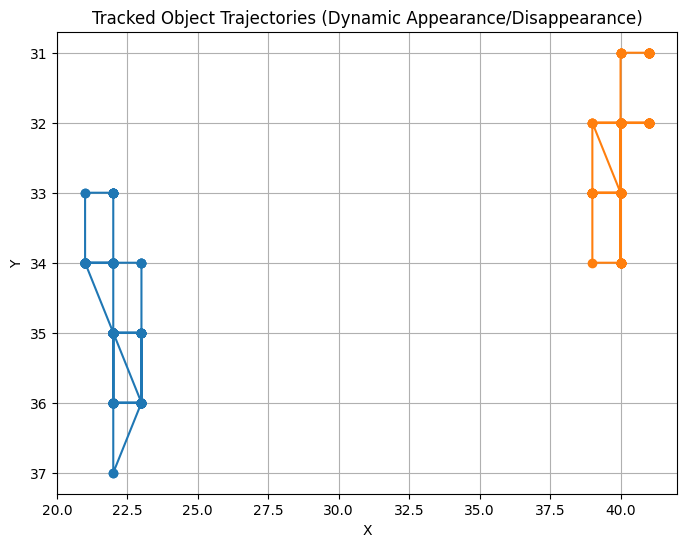

In [11]:
dist, ang, tracks = track_objects_and_plot2(circ_frames)

In [12]:
print(np.shape(dist))

(1, 401)


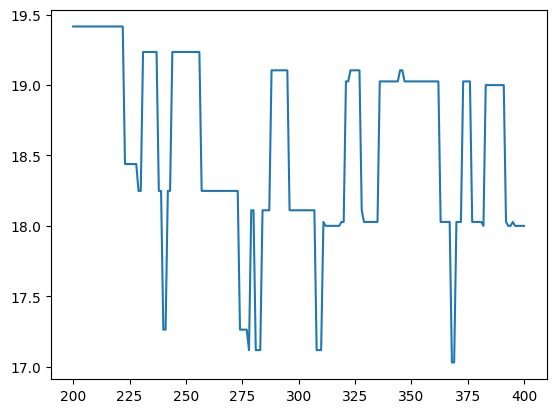

In [13]:
plt.plot(dist.T)

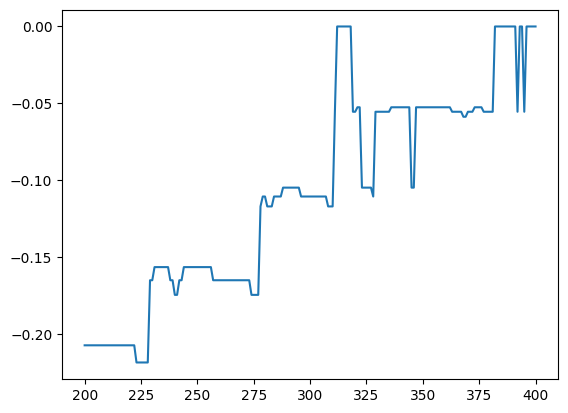

In [14]:
plt.plot(ang.T)

In [15]:
# try with just two vortices 

def generalAnimation(filename, dataset, periodic = False): 
    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
#     vort_arr = [] 
    
#     for i in range(len(antiv_traj_arr)): 
#          avi_traj = antiv_traj_arr[i] 
#          v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
#          vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])


     #    for j in range(len(vort_arr)): 
     #         vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

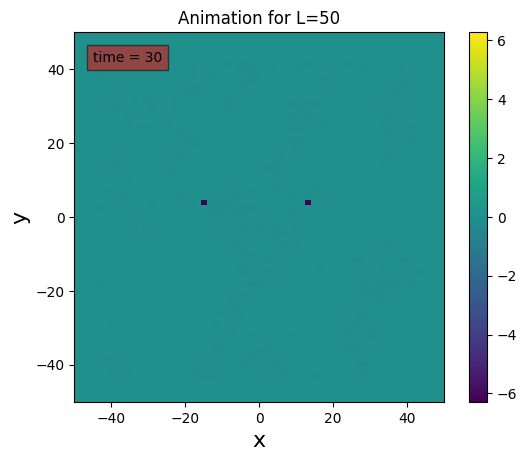

In [16]:
generalAnimation('circ_2algo.mp4', circ_frames)

In [28]:
# try with just two vortices 

def animatepsi2(filename): 
    time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')
    plt.colorbar() 
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
    vort_arr = [] 
    
    for i in range(len(tracks)): 
         avi_traj = tracks[i].positions 
         print(tracks[i].positions)
         v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
         vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(np.abs(g.snaps[i])**2)
        # loop over the existing points 
        #print(vort_arr[0])
        #v1.set_offsets([antiv_traj_arr[0][i][0]+0.5-L/2, antiv_traj_arr[0][i][1]+0.5-L/2])
        #v2.set_offsets([antiv_traj_arr[1][i][0]+0.5-L/2, antiv_traj_arr[1][i][1]+0.5-L/2])

        for j in range(len(vort_arr)): 
             vort_arr[j].set_offsets([tracks[j].positions[i,0]+0.5-L/2, tracks[j].positions[i,1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text, *vort_arr
    anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
    anim.save(path)
    plt.show() 

    return anim 
    

{95: array([36, 23], dtype=int64), 96: array([36, 23], dtype=int64), 97: array([36, 23], dtype=int64), 98: array([36, 23], dtype=int64), 99: array([36, 23], dtype=int64), 100: array([36, 23], dtype=int64), 101: array([35, 23], dtype=int64), 102: array([35, 23], dtype=int64), 103: array([35, 23], dtype=int64), 104: array([36, 23], dtype=int64), 105: array([36, 23], dtype=int64), 106: array([36, 23], dtype=int64), 107: array([36, 23], dtype=int64), 108: array([36, 23], dtype=int64), 109: array([36, 23], dtype=int64), 110: array([36, 23], dtype=int64), 111: array([36, 23], dtype=int64), 112: array([36, 23], dtype=int64), 113: array([36, 23], dtype=int64), 114: array([36, 23], dtype=int64), 115: array([36, 22], dtype=int64), 116: array([36, 22], dtype=int64), 117: array([37, 22], dtype=int64), 118: array([37, 22], dtype=int64), 119: array([36, 23], dtype=int64), 120: array([36, 23], dtype=int64), 121: array([36, 23], dtype=int64), 122: array([36, 23], dtype=int64), 123: array([36, 23], dty

KeyError: 0

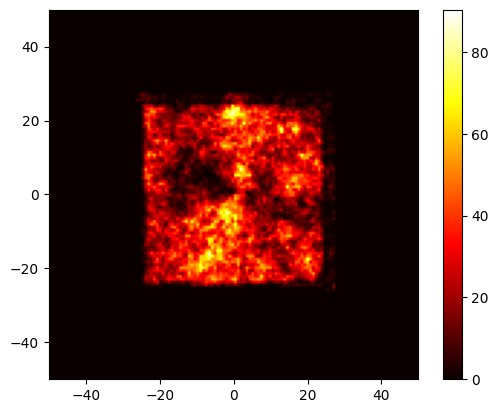

In [29]:
animatepsi2('debuggingtracking')